# Reinforcement learning
### Snake - manual policy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML

from snake import Game

### Manual policy

The snake is never moving towards certain death, and will attempt to move directly towards the apple if possible

In [2]:
policy = {}
#0/1, 0/1, 0/1, 0/1, -1/0/1, -1/0/1
#(a-S, b-E, c-N, d-W)
# e: (row) 1 go north
# f: column 1 go west
#SENW

for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(-1,2):
                    for f in range(-1,2):
                        S = int(a!=1)
                        E = int(b!=1)
                        N = int(c!=1)
                        W = int(d!=1)
                        if (e==-1):
                            S*=10
                            N*=0.1
                        elif (e==0):
                            S*=0.1
                            N*=0.1
                        elif (e==1):
                            N*=10
                            S*=0.1
                        if (f==-1):
                            E*=10
                            W*=0.1
                        elif (f==0):
                            E*=0.1
                            W*=0.1
                        elif (f==1):
                            W*=10
                            E*=0.1
                        policy[(a,b,c,d,e,f)] = (S,E,N,W)

### Game

In [3]:
# game parameters
grid = 8
s_size = 3
# start game
g = Game(grid, s_size)
g.reset()

**Run one game loop**

In [24]:
# get state
s = g.get_state()
# get policy
a = policy[tuple(s)]
# choose best action from policy (with slight randomness)
a = np.argmax(np.random.multinomial(1,np.array(a)/np.array(a).sum()))
# apply action
g.snake.d = a
# run one game step
g.iterate() 
# render game
g.draw()

#plt.imshow(g.board)
#plt.show()

### Animation

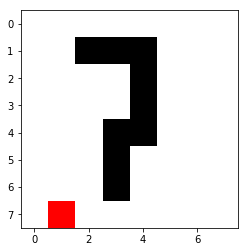

In [25]:
fig, ax = plt.subplots()
image = ax.imshow(g.board)

In [26]:
g = Game(grid, s_size)
g.reset()

def init():
    image.set_data(g.board)
    return (image,)

def animate(i):
    s = g.get_state()
    a = policy[tuple(s)]
    a = np.argmax(np.random.multinomial(1,np.array(a)/np.array(a).sum()))
    g.snake.d = a
    g.iterate() 
    g.draw()
    image.set_data(g.board)
    return (image,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=120, 
                               blit=True)

HTML(anim.to_jshtml())

/home/raphael/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [27]:
anim.save('.animations/manual.gif', writer='imagemagick', fps=30)

/home/raphael/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [28]:
from IPython.display import HTML, Image

In [29]:
Image(url='./animations/manual.gif')